In [1]:
ReloadProject('deep_learning')

Path c:\Workspace\git\ added to PYTHON_PATH.
Path c:\Workspace\git\deep_learning added to PYTHON_PATH.


Using TensorFlow backend.


notebook_init.py imported and reloaded
reloaded: a3c_impl
forwarded symbol: a3c_impl
reloaded: base
forwarded symbol: base
reloaded: circular_world_env
forwarded symbol: circular_world_env
reloaded: environment_impl
forwarded symbol: environment_impl
reloaded: guided_environments
forwarded symbol: guided_environments
reloaded: gym
forwarded symbol: gym
reloaded: interval_world_env
forwarded symbol: interval_world_env
reloaded: keras
forwarded symbol: keras
reloaded: layers
forwarded symbol: layers
reloaded: logging
forwarded symbol: logging
reloaded: model_builder
forwarded symbol: model_builder
reloaded: models
forwarded symbol: models
reloaded: numpy
forwarded symbol: numpy
reloaded: numpy_util
forwarded symbol: numpy_util
reloaded: optimizers
forwarded symbol: optimizers
reloaded: other_runners
forwarded symbol: other_runners
reloaded: policy_impl
forwarded symbol: policy_impl
reloaded: qfunc_impl
forwarded symbol: qfunc_impl
reloaded: runner_extension_impl
forwarded symbol: runner_

In [98]:
states

[[array([[ 0.02318315,  0.58242713,  0.08012372, -0.42810967]]),
  array([[ 0.03937273,  0.00450853, -0.04028056, -0.01137044]]),
  array([[-1.22393435, -0.94591479, -0.10243092, -0.30642735]]),
  array([[-1.00146948, -0.89419425, -0.05840249, -0.10293925]]),
  array([[1.26898112, 0.90985765, 0.05516422, 0.0211102 ]]),
  array([[ 0.07734736,  0.38238581,  0.00808368, -0.43614473]]),
  array([[ 0.32898555,  0.54686486,  0.01403588, -0.30861282]]),
  array([[ 0.55113367,  0.40094633,  0.01053951, -0.12118495]]),
  array([[ 0.2304714 ,  0.34016697,  0.01694664, -0.02476815]]),
  array([[ 0.81349645,  1.31489248,  0.14548658, -0.00726391]]),
  array([[-0.50330022,  0.36431455, -0.05797559, -0.07904508]]),
  array([[ 1.29932225,  1.26296664,  0.08618098, -0.25595331]]),
  array([[ 0.07301362,  0.34381018, -0.01331721, -0.5010894 ]])],
 [array([[0.77688442, 0.18271239, 0.01830044, 0.45438987]]),
  array([[ 0.07219074, -0.21979337, -0.0127479 ,  0.3597516 ]]),
  array([[-0.01872194, -0.017809

In [99]:
use_states_1 = states[0][:5]
use_states_2 = states[1][:5]

In [2]:
use_states_1 = [
    np.array([[ 0.02318315,  0.58242713,  0.08012372, -0.42810967]]),
    np.array([[ 0.03937273,  0.00450853, -0.04028056, -0.01137044]]),
    np.array([[-1.22393435, -0.94591479, -0.10243092, -0.30642735]]),
    np.array([[-1.00146948, -0.89419425, -0.05840249, -0.10293925]]),
    np.array([[1.26898112, 0.90985765, 0.05516422, 0.0211102 ]])]

In [3]:
use_states_2 = [
    np.array([[0.77688442, 0.18271239, 0.01830044, 0.45438987]]),
    np.array([[ 0.07219074, -0.21979337, -0.0127479 ,  0.3597516 ]]),
    np.array([[-0.01872194, -0.01780948,  0.03422948,  0.07417699]]),
    np.array([[-0.03013217,  0.19765872,  0.05044142, -0.19798146]]),
    np.array([[ 0.04643257, -0.19702157, -0.01337837,  0.30328672]])]

## A3C -- try 1

In [4]:
running_environment.ForceCpuForTheRun()

In [5]:
batch_size = 64  # used in qfunc and runner.
env = environment_impl.GymEnvironment(gym.make('CartPole-v0'))
brain = a3c_impl.A3C(
    model=a3c_impl.CreateModel(
        state_shape=env.GetStateShape(),
        action_space_size=env.GetActionSpaceSize(),
        hidden_layer_sizes=(12,),
    )
)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [6]:
%%time
logging.ENV.debug_verbosity = 6
runner = a3c_impl.NStepExperienceRunner()
runner.AddCallback(runner_extension_impl.ProgressTracer(report_every_num_of_episodes=100))
runner.AddCallback(runner_extension_impl.ValueTracer(trace_states=use_states_1 + use_states_2, trace_actions=[0, 1]))

Wall time: 0 ns


[20:45:12] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 100/1000: avg_reward = 10.85, avg_steps=9.85 (over 100 episodes)
[20:45:14] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 200/1000: avg_reward = 9.70, avg_steps=8.70 (over 100 episodes)
[20:45:16] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 300/1000: avg_reward = 13.72, avg_steps=12.72 (over 100 episodes)
[20:45:19] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 400/1000: avg_reward = 18.33, avg_steps=17.33 (over 100 episodes)
[20:45:22] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 500/1000: avg_reward = 18.37, avg_steps=17.37 (over 100 episodes)
[20:45:25] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 600/1000: avg_reward = 14.77, avg_steps=13.77 (over 100 episodes)
[20:45:26] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 700/1000: av

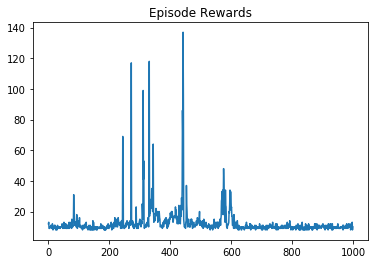

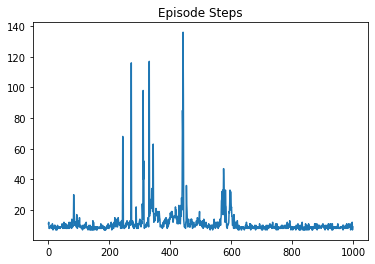

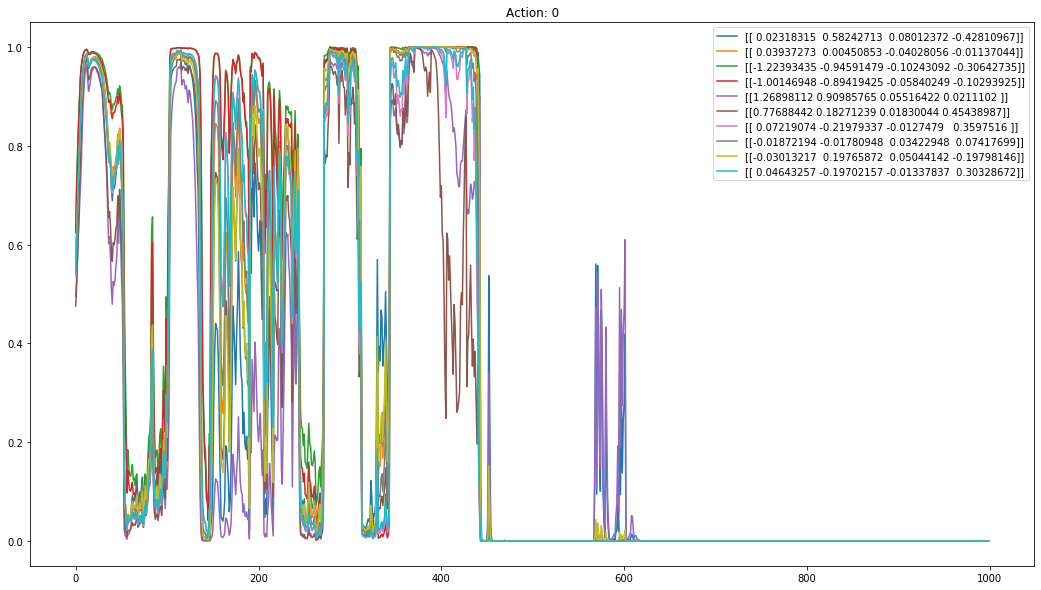

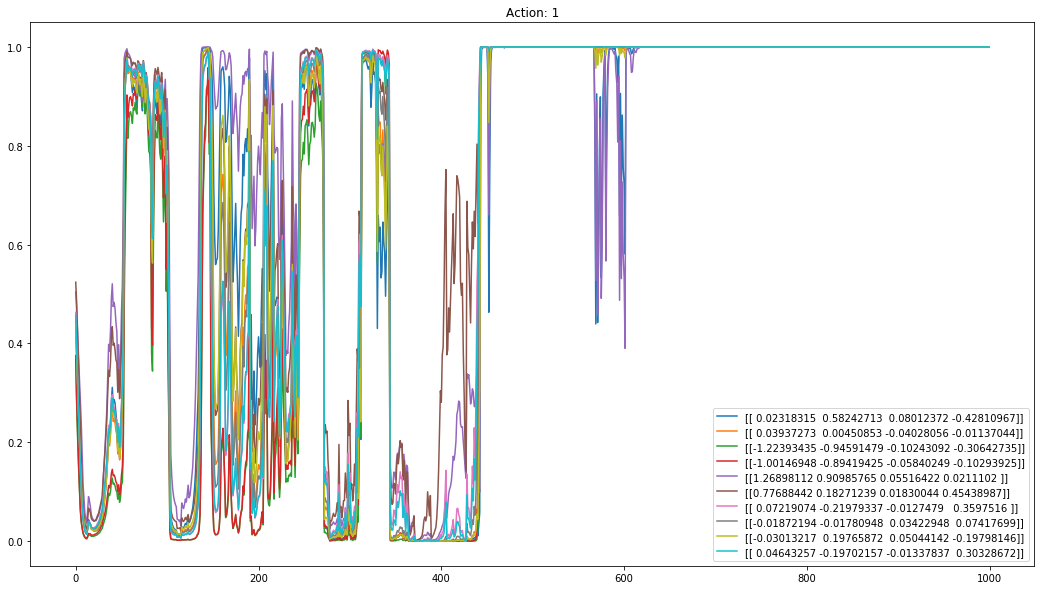

Wall time: 26.5 s


In [7]:
%%time
runner.Run(env=env, brain=brain, policy=policy_impl.GreedyPolicyWithRandomness(epsilon=0.1), num_of_episodes=1200)

## A3C Hybrid Approach

Instructions for updating:
keep_dims is deprecated, use keepdims instead


W0811 20:48:57.413291 42068 deprecation.py:506] From <ipython-input-11-9a7640eb20bc>:103: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


[20:49:00] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 100/1200: avg_reward = 19.18, avg_steps=18.18 (over 100 episodes)
[20:49:01] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 200/1200: avg_reward = 20.09, avg_steps=19.09 (over 100 episodes)
[20:49:02] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 300/1200: avg_reward = 20.89, avg_steps=19.89 (over 100 episodes)
[20:49:04] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 400/1200: avg_reward = 28.60, avg_steps=27.60 (over 100 episodes)
[20:49:05] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 500/1200: avg_reward = 34.63, avg_steps=33.63 (over 100 episodes)
[20:49:07] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 600/1200: avg_reward = 38.40, avg_steps=37.40 (over 100 episodes)
[20:49:08] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 700/1200:

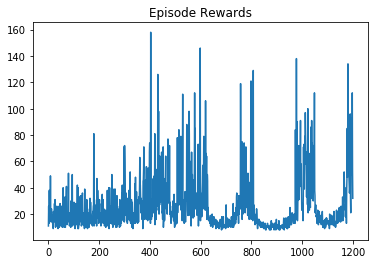

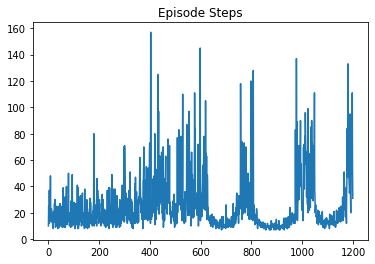

In [11]:
# OpenGym CartPole-v0 with A3C on GPU
# -----------------------------------
#
# A3C implementation with GPU optimizer threads.
#
# Made as part of blog series Let's make an A3C, available at
# https://jaromiru.com/2017/02/16/lets-make-an-a3c-theory/
#
# author: Jaromir Janisch, 2017
import gym

from deep_learning.engine import base
from deep_learning.engine import environment_impl
from deep_learning.engine import policy_impl
from deep_learning.engine import runner_extension_impl
from deep_learning.engine.base import States
from deep_learning.engine.base import Transition
from deep_learning.engine.base import Values
from deep_learning.experimental import a3c_impl
from qpylib import running_environment
from qpylib import t

running_environment.ForceCpuForTheRun()

import threading

import tensorflow as tf
from absl import app
from keras.layers import *
from keras.models import *

# -- constants
ENV = 'CartPole-v0'

RUN_TIME = 60
THREADS = 1
OPTIMIZERS = 1
THREAD_DELAY = 0.001

GAMMA = 0.99

N_STEP_RETURN = 8
GAMMA_N = GAMMA ** N_STEP_RETURN

EPS_START = 0.4
EPS_STOP = .15
EPS_STEPS = 75000

MIN_BATCH = 32
LEARNING_RATE = 5e-3

LOSS_V = .5  # v loss coefficient
LOSS_ENTROPY = .01  # entropy coefficient

count = 0
rewards = []

env = environment_impl.GymEnvironment(gym_env=gym.make('CartPole-v0'))
NUM_STATE = env.GetStateShape()[0]
NUM_ACTIONS = env.GetActionSpaceSize()
NONE_STATE = np.zeros(NUM_STATE)


# ---------
class JBrain:
  train_queue = [[], [], [], [], []]  # s, a, r, s', s' terminal mask
  lock_queue = threading.Lock()

  def __init__(self):
    self.session = tf.Session()
    K.set_session(self.session)
    K.manual_variable_initialization(True)

    self.model = self._build_model()
    self.graph = self._build_graph(self.model)

    self.session.run(tf.global_variables_initializer())
    self.default_graph = tf.get_default_graph()

    self.default_graph.finalize()  # avoid modifications

  def _build_model(self):

    l_input = Input(batch_shape=(None, NUM_STATE))
    l_dense = Dense(16, activation='relu')(l_input)

    out_actions = Dense(NUM_ACTIONS, activation='softmax')(l_dense)
    out_value = Dense(1, activation='linear')(l_dense)

    model = Model(inputs=[l_input], outputs=[out_actions, out_value])
    model._make_predict_function()  # have to initialize before threading

    return model

  def _build_graph(self, model):
    s_t = tf.placeholder(tf.float32, shape=(None, NUM_STATE))
    a_t = tf.placeholder(tf.float32, shape=(None, NUM_ACTIONS))
    r_t = tf.placeholder(tf.float32, shape=(
      None, 1))  # not immediate, but discounted n step reward

    p, v = model(s_t)

    log_prob = tf.log(tf.reduce_sum(p * a_t, axis=1, keep_dims=True) + 1e-10)
    advantage = r_t - v

    loss_policy = - log_prob * tf.stop_gradient(advantage)  # maximize policy
    loss_value = LOSS_V * tf.square(advantage)  # minimize value error
    entropy = LOSS_ENTROPY * tf.reduce_sum(p * tf.log(p + 1e-10), axis=1,
                                           keep_dims=True)  # maximize entropy (regularization)

    loss_total = tf.reduce_mean(loss_policy + loss_value + entropy)

    optimizer = tf.train.RMSPropOptimizer(LEARNING_RATE, decay=.99)
    minimize = optimizer.minimize(loss_total)

    return s_t, a_t, r_t, minimize

  def optimize(self):
    if len(self.train_queue[0]) < MIN_BATCH:
      # time.sleep(0)  # yield
      return

    with self.lock_queue:
      if len(self.train_queue[
               0]) < MIN_BATCH:  # more thread could have passed without lock
        return  # we can't yield inside lock

      s, a, r, s_, s_mask = self.train_queue
      self.train_queue = [[], [], [], [], []]

    s = np.vstack(s)
    a = np.vstack(a)
    r = np.vstack(r)
    s_ = np.vstack(s_)
    s_mask = np.vstack(s_mask)

    if len(s) > 5 * MIN_BATCH: print(
      "Optimizer alert! Minimizing batch of %d" % len(s))

    v = self.predict_v(s_)
    r = r + GAMMA_N * v * s_mask  # set v to 0 where s_ is terminal state

    s_t, a_t, r_t, minimize = self.graph
    self.session.run(minimize, feed_dict={s_t: s, a_t: a, r_t: r})

  def train_push(self, s, a, r, s_):
    with self.lock_queue:
      self.train_queue[0].append(s)
      self.train_queue[1].append(a)
      self.train_queue[2].append(r)

      if s_ is None:
        self.train_queue[3].append(NONE_STATE)
        self.train_queue[4].append(0.)
      else:
        self.train_queue[3].append(s_)
        self.train_queue[4].append(1.)

  def predict(self, s):
    with self.default_graph.as_default():
      p, v = self.model.predict(s)
      return p, v

  def predict_p(self, s):
    with self.default_graph.as_default():
      p, v = self.model.predict(s)
      return p

  def predict_v(self, s):
    with self.default_graph.as_default():
      p, v = self.model.predict(s)
      return v


class QBrain(base.Brain):

  def __init__(self):
    self._jbrain = JBrain()

  def GetValues(self, states: States) -> Values:
    return self._jbrain.predict_p(states)

  def UpdateFromTransitions(self, transitions: t.Iterable[Transition]) -> None:
    for tran in transitions:
      if tran.sp is not None:
        self._jbrain.train_push(tran.s[0], tran.a[0], tran.r, tran.sp[0])
      else:
        self._jbrain.train_push(tran.s[0], tran.a[0], tran.r, NONE_STATE)
    self._jbrain.optimize()

  def Save(self, filepath: t.Text) -> None:
    pass

  def Load(self, filepath: t.Text) -> None:
    pass


def main():
  brain = QBrain()
  policy = policy_impl.PolicyWithDecreasingRandomness(
    base_policy=a3c_impl.WeightedPiPolicy(),
    initial_epsilon=0.4,
    final_epsilon=0.05,
    decay_by_half_after_num_of_episodes=500,
  )
  runner = a3c_impl.NStepExperienceRunner()
  runner.AddCallback(
    runner_extension_impl.ProgressTracer(report_every_num_of_episodes=100))
  runner.Run(env=env, brain=brain, policy=policy, num_of_episodes=1200)


main()

## A3C -- try 2

In [ ]:
running_environment.ForceCpuForTheRun()

In [ ]:
batch_size = 64  # used in qfunc and runner.
env = environment_impl.GymEnvironment(gym.make('CartPole-v0'))
brain = a3c_impl.A3C(
    model=a3c_impl.CreateModel(
        state_shape=env.GetStateShape(),
        action_space_size=env.GetActionSpaceSize(),
        hidden_layer_sizes=(12,),
    )
)

In [ ]:
policy = policy_impl.PolicyWithDecreasingRandomness(
    base_policy=a3c_impl.WeightedPiPolicy(),
    initial_epsilon=0.4,
    final_epsilon=0.05,
    decay_by_half_after_num_of_episodes=500,
)
runner = a3c_impl.NStepExperienceRunner()
runner.AddCallback(runner_extension_impl.ProgressTracer(report_every_num_of_episodes=100))

In [ ]:
runner.Run(env=env, brain=brain, policy=policy, num_of_episodes=1200)

## A3C -- try 3

In [ ]:
batch_size = 64  # used in qfunc and runner.
env = environment_impl.GymEnvironment(gym.make('CartPole-v0'))
brain = a3c_impl.A3C(
    model=a3c_impl.CreateModel(
        state_shape=env.GetStateShape(),
        action_space_size=env.GetActionSpaceSize(),
        hidden_layer_sizes=(12,),
    )
)

